## Analyze brighter-fatter kernels from PhoSim, ImSim, HSC, lab-based ITL
Michael Wood-Vasey  (2018-09-11)

1. Read in saved versions of kernels that were generated in previous processing, such as by `make_brighter_fatter_kernel.ipynb`
2. Visualize the kernels and compare PhoSim, ImSim, HSC, and lab-based ITL.

There's duplication between `make_brighter_fatter_kernel.ipynb` and this present `analyze_brighter_fatter_kernel.ipynb`, but this separate existence of the prseent is meant to simplify the investigation and analysis of brighter-fatter kernels, indepent from the DM stack, or any requirements beyond very standard `numpy`, `matplotlib`, and `astropy`.

### Logistics

This is meant to be runnable anywhere from within the `DC2-production/Notebooks` directory.

## References
* For an introduction to the brighter-fatter effect, see 
  - http://adsabs.harvard.edu/abs/2014JInst...9C3048A  Antilogous, Astier, Guyonnet, Regnault. 2014. JInst, 9, C3048.
* For a starting place for DESC thinking about brighter-fatter, see 
  - https://confluence.slac.stanford.edu/display/LSSTDESC/Brighter+Fatter+Effect   (DESC private page)
* See Andrew Bradshaw's [StackClub](https://github.com/LSSTScienceCollaborations/StackClub) notebook studying the brighter-fatter effect on stars and galaxies projected from the lab-based beam simulator.
  - [Rendered] http://nbviewer.jupyter.org/url/andrewnomy.com/sync/BrighterFatterCorrection.ipynb?flush_cache=true
  - [Raw] https://github.com/LSSTScienceCollaborations/StackClub/blob/project/beamsim/andrewkbradshaw/ImageProcessing/BrighterFatterCorrection.ipynb
* Analysis of Brighter-Fatter in DECam
  - http://adsabs.harvard.edu/abs/2015JInst..10C5032G  Gruen, Berstein, Jarvis, Rowe, Vikram, Plazas, Seitz.  2015.  JInst, 10, C5032.

### DM-Free Inspection of BF kernels
Copies of the BF kernels generated elsewhere are saved here in `DC2-production/Notebooks/bf_kernels`.  The stack-generated BF kernels are just 2D arrays as the value of a simple single-element dictionary where the key is the amp name and are Python pickled.

The full persisted version of the BF kernel includes a trivial lightweight wrapping of an object, but that object is in the `lsst` Python hierarchy and so thus would require the stack to read.  I've here extract edthe kernel attribute from that object which is that simple dictionary.

* PhoSim  
```
bf_kernels/PhoSim/bfKernel-R22-S11-det094.pkl
```
* ImSim  
```
bf_kernels/ImSim/bfKernel-R01-S00-det000.pkl
bf_kernels/ImSim/bfKernel-R01-S01-det001.pkl
bf_kernels/ImSim/bfKernel-R01-S02-det002.pkl
bf_kernels/ImSim/bfKernel-R01-S10-det003.pkl
```
* HSC  
`bf_kernels/HSC/hsc_brighter_fatter_kernel.pkl`
* ITL (lab-based)  
`bf_kernels/Lab/BF_kernel-ITL_3800C_002.fits`  
The lab-based (ITL) BF kernel is a FITS file.  No dictionary, just a 2D array stored as a FITS image.

In [10]:
import os
import pickle

import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

### Look at the PhoSim BF Kernel

In [11]:
phosim_bf_kernel_file = 'bf_kernels/PhoSim/bfKernel-R22-S11-det094.pkl'
phosim_detector = 0  # Yes, I know this doesn't make sense.  It should be '94'

with open(phosim_bf_kernel_file, mode='rb') as f:
    phosim_bf_kernel = pickle.load(f)

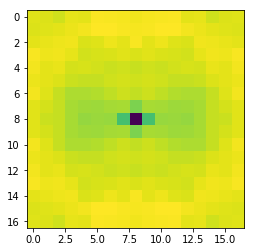

In [12]:
plt.imshow(phosim_bf_kernel[phosim_detector])

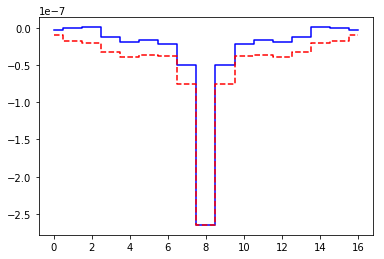

In [13]:
plt.plot(phosim_bf_kernel[phosim_detector][:,8], color='blue', drawstyle='steps-mid')
plt.plot(phosim_bf_kernel[phosim_detector][8,:], linestyle='--', color='red', drawstyle='steps-mid')

### Look at the ImSim BF Kernel


In [14]:
imsim_detectors = (0, 1, 2, 3)
imsim_sensors = (0, 1, 2, 10)
imsim_bf_kernel_files = ['bf_kernels/ImSim/bfKernel-R01-S{:02d}-det{:03d}.pkl'.format(s, n) for s, n in zip(imsim_sensors, imsim_detectors)] 

In [15]:
imsim_bf_kernel = {}
for kernel_file in imsim_bf_kernel_files:
    with open(kernel_file, 'rb') as f:
        this_bf_kernel = pickle.load(f)
    imsim_bf_kernel.update(this_bf_kernel)

In [16]:
print(imsim_bf_kernel.keys())

dict_keys([0, 1, 2, 3])


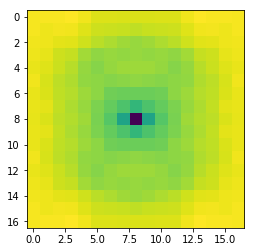

In [17]:
plt.imshow(imsim_bf_kernel[0])
plt.imshow(imsim_bf_kernel[1])
plt.imshow(imsim_bf_kernel[2])
plt.imshow(imsim_bf_kernel[3])

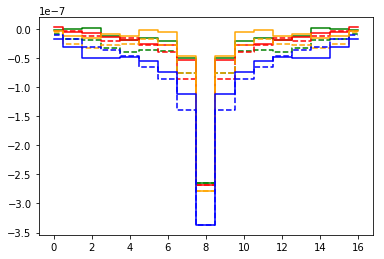

In [18]:
plt.plot(imsim_bf_kernel[0][:,8], color='green', drawstyle='steps-mid')
plt.plot(imsim_bf_kernel[0][8,:], color='green', linestyle='--', drawstyle='steps-mid')

plt.plot(imsim_bf_kernel[1][:,8], color='red', drawstyle='steps-mid')
plt.plot(imsim_bf_kernel[1][8,:], color='red', linestyle='--', drawstyle='steps-mid')

plt.plot(imsim_bf_kernel[2][:,8], color='orange', drawstyle='steps-mid')
plt.plot(imsim_bf_kernel[2][8,:], color='orange', linestyle='--', drawstyle='steps-mid')

plt.plot(imsim_bf_kernel[3][:,8], color='blue', drawstyle='steps-mid')
plt.plot(imsim_bf_kernel[3][8,:], color='blue', linestyle='--', drawstyle='steps-mid')

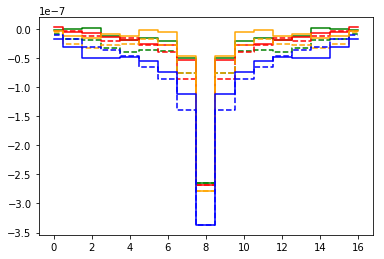

In [19]:
plt.plot(imsim_bf_kernel[0][:,8], color='green', drawstyle='steps-mid')
plt.plot(imsim_bf_kernel[0][8,:], color='green', linestyle='--', drawstyle='steps-mid')

plt.plot(imsim_bf_kernel[1][:,8], color='red', drawstyle='steps-mid')
plt.plot(imsim_bf_kernel[1][8,:], color='red', linestyle='--', drawstyle='steps-mid')

plt.plot(imsim_bf_kernel[2][:,8], color='orange', drawstyle='steps-mid')
plt.plot(imsim_bf_kernel[2][8,:], color='orange', linestyle='--', drawstyle='steps-mid')

plt.plot(imsim_bf_kernel[3][:,8], color='blue', drawstyle='steps-mid')
plt.plot(imsim_bf_kernel[3][8,:], color='blue', linestyle='--', drawstyle='steps-mid')

In [20]:
imsim_detector = 0  # We have 4.  Let's use this one when comparing below.

## HSC Brighter-Fatter Kernel
Calculated by Will Coulton  
Merlin Fisher-Levine has also calculated version.

This is the brighter-fatter kernel for CCD 41.  The HSC BF corrections were done based purely on the results from this CCD.

In [21]:
hsc_detector = 41
# hsc_bf_kernel_file = 'hsc_bfKernel-{:03d}.pkl'.format(hsc_detector)
hsc_bf_kernel_file = 'bf_kernels/HSC/hsc_brighter_fatter_kernel.pkl'

with open(hsc_bf_kernel_file, 'rb') as f:
    hsc_bf_kernel = pickle.load(f, encoding='bytes')

# For the generic HSC BF kernel, stuff it into a dictionary so it looks like the other ones
hsc_bf_kernel = {hsc_detector: hsc_bf_kernel}

Text(0,0.5,'Brighter-Fatter Kernel')

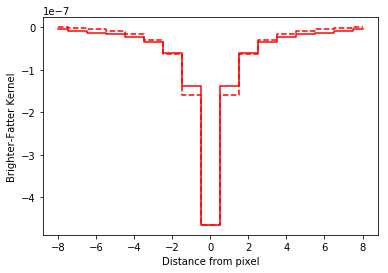

In [22]:
hsc_bf_radius = len(hsc_bf_kernel[hsc_detector])//2
r = np.arange(-hsc_bf_radius, +hsc_bf_radius+1)
plt.plot(r, hsc_bf_kernel[hsc_detector][:,hsc_bf_radius], color='red', drawstyle='steps-mid', label='HSC CCD 41 x')
plt.plot(r, hsc_bf_kernel[hsc_detector][hsc_bf_radius,:], color='red', linestyle='--', drawstyle='steps-mid', label='HSC CCD 41 y')
plt.xlabel('Distance from pixel')
plt.ylabel('Brighter-Fatter Kernel')

## Lab-based BF measurements

Let's compare this to lab-based ITL data from Craige Lage and Andrew Bradshaw.  I've taken the liberty of copying into this `DC2-production` repo the BF kernel they calculated from flats in the lab.

In [23]:
from astropy.io import fits
lab_bf_kernel = fits.getdata('bf_kernels/Lab/BF_kernel-ITL_3800C_002.fits')
# Make it look like the other ones
lab_detector = 2
lab_bf_kernel = {lab_detector: lab_bf_kernel}

In [24]:
# Create some dicts to simplify code below
ref_detectors = {'PhoSim': phosim_detector, 'ImSim': imsim_detector, 'HSC': hsc_detector, 'ITL': lab_detector}
bf_kernels = {'PhoSim': phosim_bf_kernel, 'ImSim': imsim_bf_kernel, 'HSC': hsc_bf_kernel, 'ITL': lab_bf_kernel}
colors = {'PhoSim': 'blue', 'ImSim': 'green', 'HSC': 'red', 'ITL': 'orange'}

In [25]:
bf_centers = {k: len(bf_kernels[k][ref_detectors[k]])//2 for k in bf_kernels}

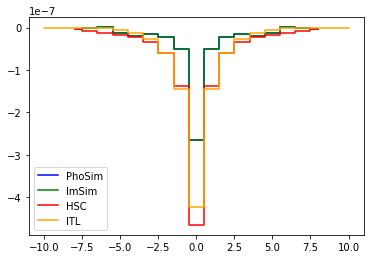

In [26]:
for k, bf in bf_kernels.items():
    r = np.arange(-bf_centers[k], +bf_centers[k]+1)
    kernel_row = bf_kernels[k][ref_detectors[k]][:, bf_centers[k]]
    plt.plot(r, kernel_row,
             drawstyle='steps-mid', color=colors[k], label='{}'.format(k))

plt.legend()

Hmmmm... are these just multiplicatively scaled versions?

Let's normalize to the central pixel.

In [27]:
central_values = {k: bf_kernels[k][ref_detectors[k]][bf_centers[k], bf_centers[k]] for k in bf_kernels}
ref_scale = 'ITL'
scale = {k: central_values[ref_scale]/central_values[k] for k in central_values}

# phosim_scale, imsim_scale, hsc_scale, lab_scale = 0.055, 1.6, 0.92, 1

In [28]:
print(central_values)
print(scale)

{'PhoSim': -2.6468218297577638e-07, 'ImSim': -2.6468218297577638e-07, 'HSC': -4.6531742334076819e-07, 'ITL': -4.2391528333512312e-07}
{'PhoSim': 1.6016011299631743, 'ImSim': 1.6016011299631743, 'HSC': 0.91102387761800008, 'ITL': 1.0}


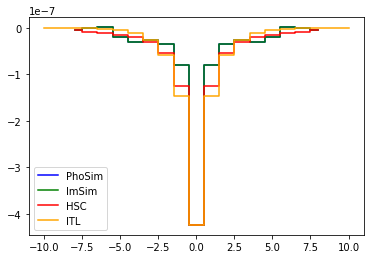

In [29]:
for k, bf in bf_kernels.items():
    r = np.arange(-bf_centers[k], +bf_centers[k]+1)
    kernel_row = bf_kernels[k][ref_detectors[k]][:, bf_centers[k]]
    plt.plot(r, scale[k] * kernel_row,
             drawstyle='steps-mid', color=colors[k], label='{}'.format(k))

plt.legend()

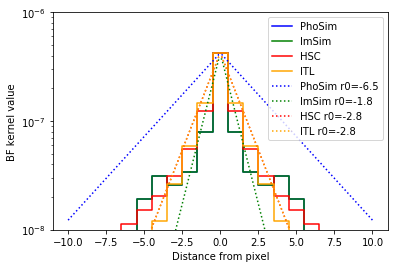

In [30]:
for k, bf in bf_kernels.items():
    r = np.arange(-bf_centers[k], +bf_centers[k]+1)
    kernel_row = bf_kernels[k][ref_detectors[k]][:, bf_centers[k]]
    plt.plot(r, - scale[k] * kernel_row,
             drawstyle='steps-mid', color=colors[k], label='{}'.format(k))

A = -central_values[ref_scale]
r0 = {'PhoSim': -6.5, 'ImSim': -1.8, 'HSC': -2.8, 'ITL': -2.8}
distance = np.linspace(-bf_centers[ref_scale], +bf_centers[ref_scale], 100)
for k, r in r0.items():
    plt.plot(distance, A*10**(-np.abs(distance/r)),
             color=colors[k], linestyle=':',
             label='{} r0={:.1f}'.format(k, r))

plt.ylim(1e-8, 1e-6)
plt.yscale('log')

plt.xlabel('Distance from pixel')
plt.ylabel('BF kernel value')

plt.legend()